In [1]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt
import sys
import os

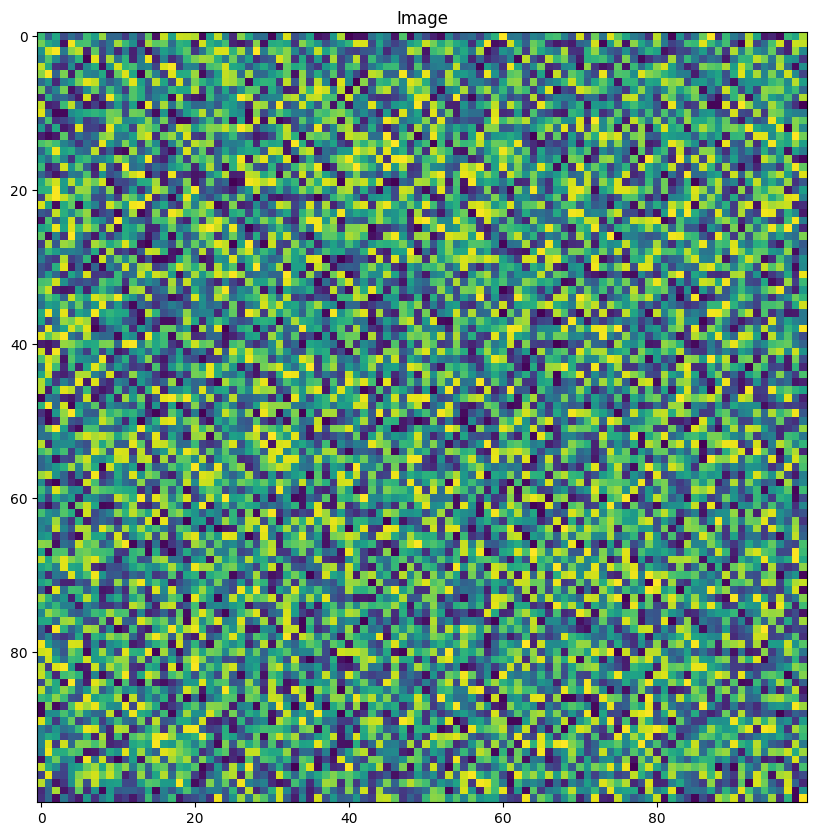

In [2]:
def show(img, figsize=(10,10), title="Image"):
    figure=plt.figure(figsize=figsize)

    plt.title(title)
    plt.imshow(img)
    plt.show()

dummy = np.random.randint(0, 255, (100, 100)).astype(np.uint8)
show(dummy)

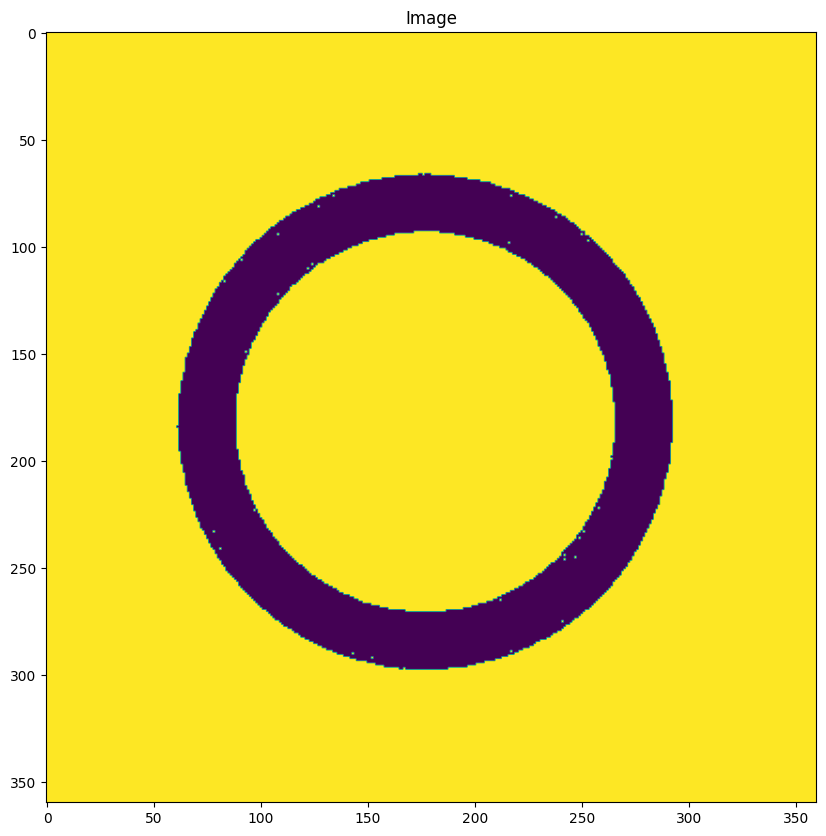

In [39]:
img = cv2.imread("bg24.jpg", 1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)[1]
show(th)

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the uploaded image
image_path = "bg22.png"
img = cv2.imread(image_path)

# Get image dimensions
height, width, _ = img.shape
(height, width)


(460, 819)

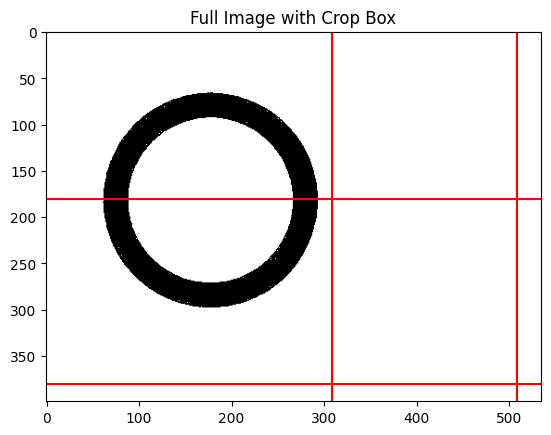

In [40]:
plt.imshow(th, cmap='gray')
plt.axhline(180, color='red')
plt.axhline(380, color='red')
plt.axvline(309, color='red')
plt.axvline(509, color='red')
plt.title('Full Image with Crop Box')
plt.show()


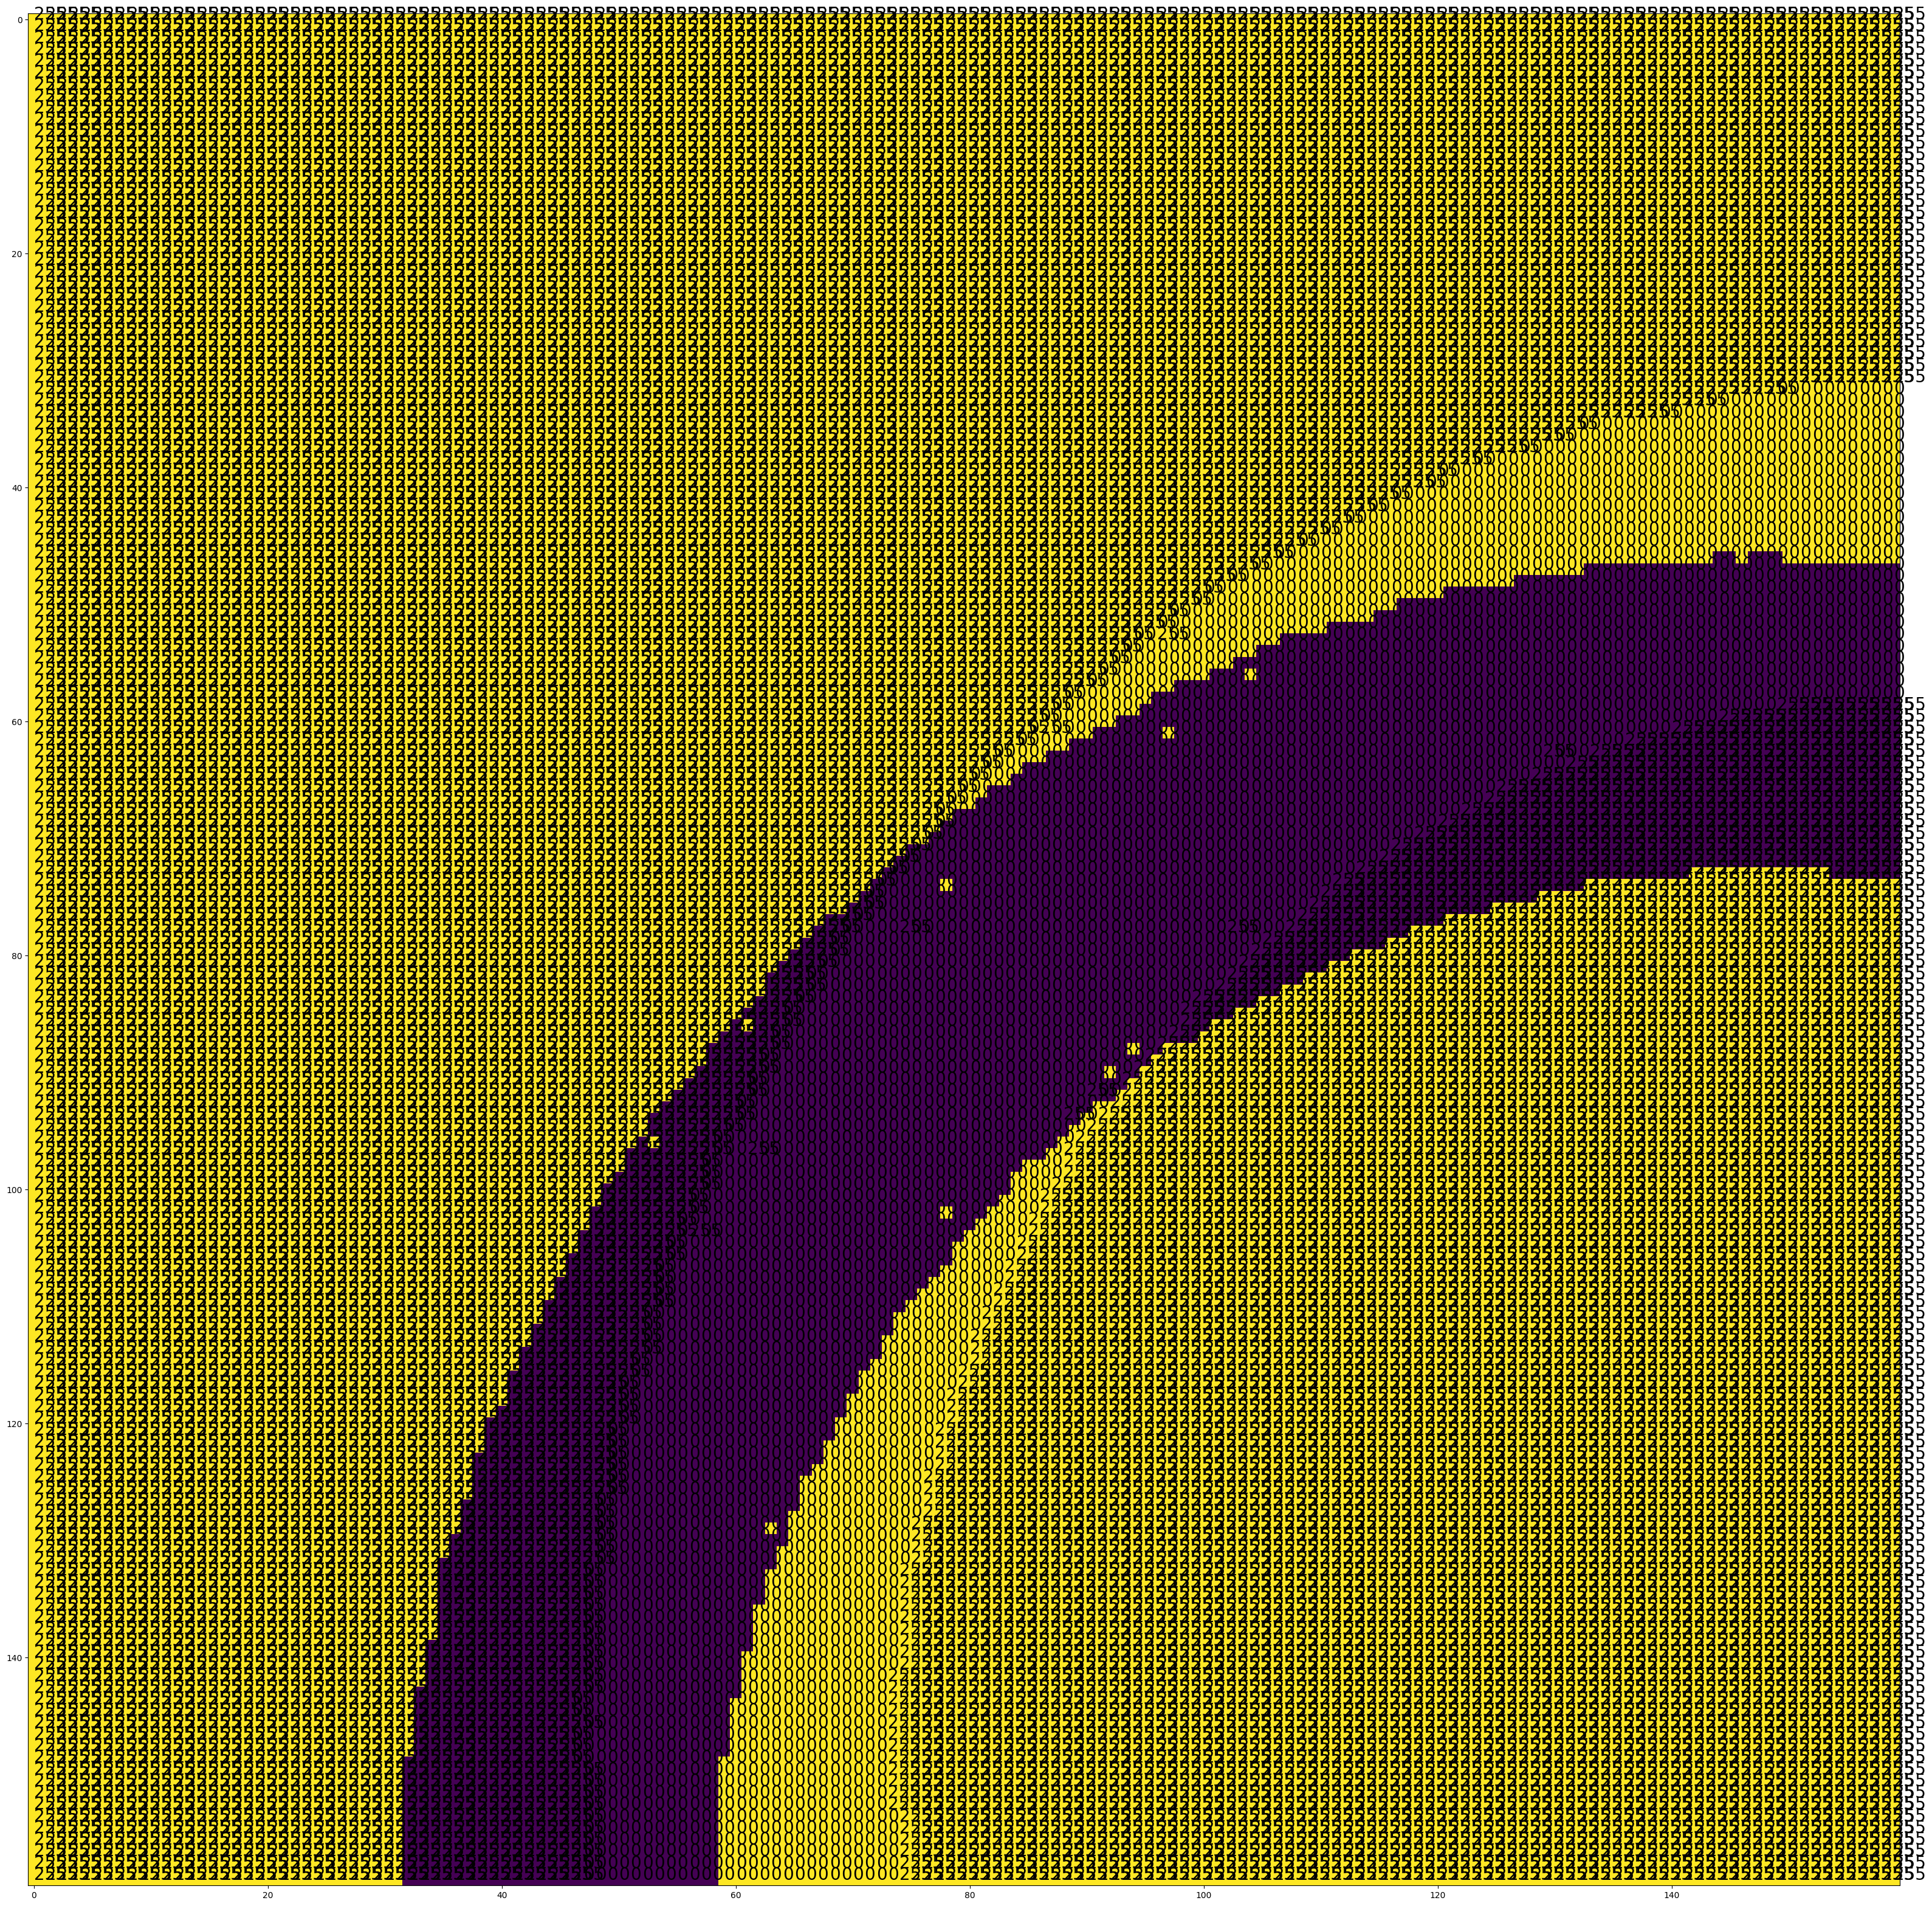

In [49]:
g = th[20:180, 30:190]
figure = plt.figure(figsize = (40, 40))

for i, row in enumerate(g):
    for j, col in enumerate(row):
        plt.annotate(col, (i, j), fontsize=20)

plt.imshow(g)
plt.show()

In [51]:
def RLE_encoding(img):
    ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    encoding = []
    count = 0
    fimg = img.flatten()
    prev = None

    for pixel in fimg:
        if prev is None:
            prev = pixel 
            count+=1
        else:
            if prev != pixel:
                encoding.append((count, prev))
                prev = pixel
                count = 1 
            else:
                count+=1 
    encoding.append((count,prev))
    return np.array(encoding)

In [52]:
RLE_encoding(g)

array([[7504,  255],
       [   2,    0],
       [   1,  255],
       [   3,    0],
       [ 143,  255],
       [  27,    0],
       [ 127,  255],
       [  33,    0],
       [ 121,  255],
       [  39,    0],
       [ 117,  255],
       [  43,    0],
       [ 115,  255],
       [  45,    0],
       [ 111,  255],
       [  49,    0],
       [ 107,  255],
       [  53,    0],
       [ 105,  255],
       [  55,    0],
       [ 103,  255],
       [  57,    0],
       [ 101,  255],
       [   3,    0],
       [   1,  255],
       [  55,    0],
       [  98,  255],
       [  62,    0],
       [  96,  255],
       [  64,    0],
       [  95,  255],
       [  65,    0],
       [  93,  255],
       [  67,    0],
       [  91,  255],
       [   6,    0],
       [   1,  255],
       [  62,    0],
       [  89,  255],
       [  71,    0],
       [  87,  255],
       [  73,    0],
       [  85,  255],
       [  75,    0],
       [  84,  255],
       [  76,    0],
       [  82,  255],
       [  78,

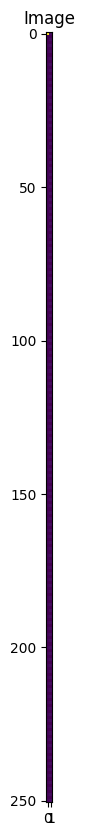

In [53]:
show(RLE_encoding(g))

In [54]:
def RLE_decode(encoded, shape):
    decoded = []

    for ev in encoded:
        r, pix = ev[0], ev[1]
        decoded.extend([pix]*r)
    dimg = np.array(decoded).reshape(shape)

    return dimg

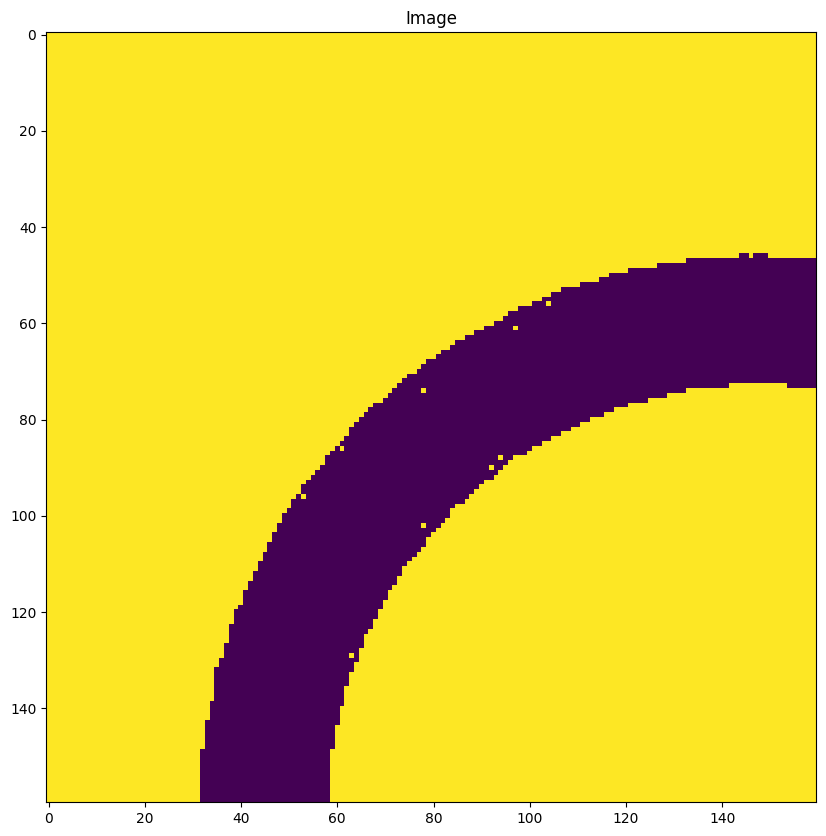

In [58]:
decoded_img = RLE_decode(RLE_encoding(g), g.shape)
show(decoded_img)


Compression Ratio: 33.46


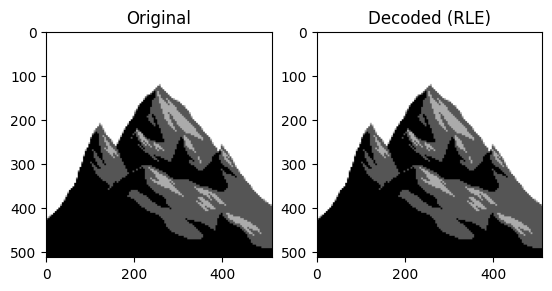

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load a grayscale image
image = cv2.imread('bg25.png', cv2.IMREAD_GRAYSCALE)

# Step 2: RLE Encode
def rle_encode(image):
    flat = image.flatten()
    encoded = []
    prev_pixel = flat[0]
    count = 1
    for pixel in flat[1:]:
        if pixel == prev_pixel:
            count += 1
        else:
            encoded.append((prev_pixel, count))
            prev_pixel = pixel
            count = 1
    encoded.append((prev_pixel, count))
    return encoded

# Step 3: RLE Decode
def rle_decode(encoded, shape):
    flat = []
    for pixel, count in encoded:
        flat.extend([pixel] * count)
    return np.array(flat, dtype=np.uint8).reshape(shape)

# Compress and decompress
encoded = rle_encode(image)
decoded = rle_decode(encoded, image.shape)

# Compression stats
original_size = image.size
encoded_size = len(encoded) * 2
compression_ratio = original_size / encoded_size
print(f"Compression Ratio: {compression_ratio:.2f}")

# Show results
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(image, cmap='gray')

plt.subplot(1,2,2)
plt.title("Decoded (RLE)")
plt.imshow(decoded, cmap='gray')
plt.show()


Original size: 400, Encoded length: 8 x 2
Compression ratio: 25.00


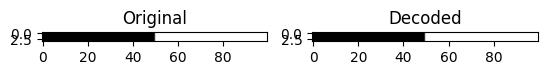

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Create a fake image with repeated pixel blocks
image = np.array([
    [100]*50 + [200]*50,
    [100]*50 + [200]*50,
    [100]*50 + [200]*50,
    [100]*50 + [200]*50,
], dtype=np.uint8)

def rle_encode(image):
    flat = image.flatten()
    encoded = []
    prev_pixel = flat[0]
    count = 1
    for pixel in flat[1:]:
        if pixel == prev_pixel:
            count += 1
        else:
            encoded.append((prev_pixel, count))
            prev_pixel = pixel
            count = 1
    encoded.append((prev_pixel, count))
    return encoded

def rle_decode(encoded, shape):
    flat = []
    for pixel, count in encoded:
        flat.extend([pixel] * count)
    return np.array(flat, dtype=np.uint8).reshape(shape)

encoded = rle_encode(image)
decoded = rle_decode(encoded, image.shape)

print(f"Original size: {image.size}, Encoded length: {len(encoded)} x 2")
print(f"Compression ratio: {image.size / (len(encoded) * 2):.2f}")

# Plot original and decoded
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Decoded")
plt.imshow(decoded, cmap='gray')
plt.show()
